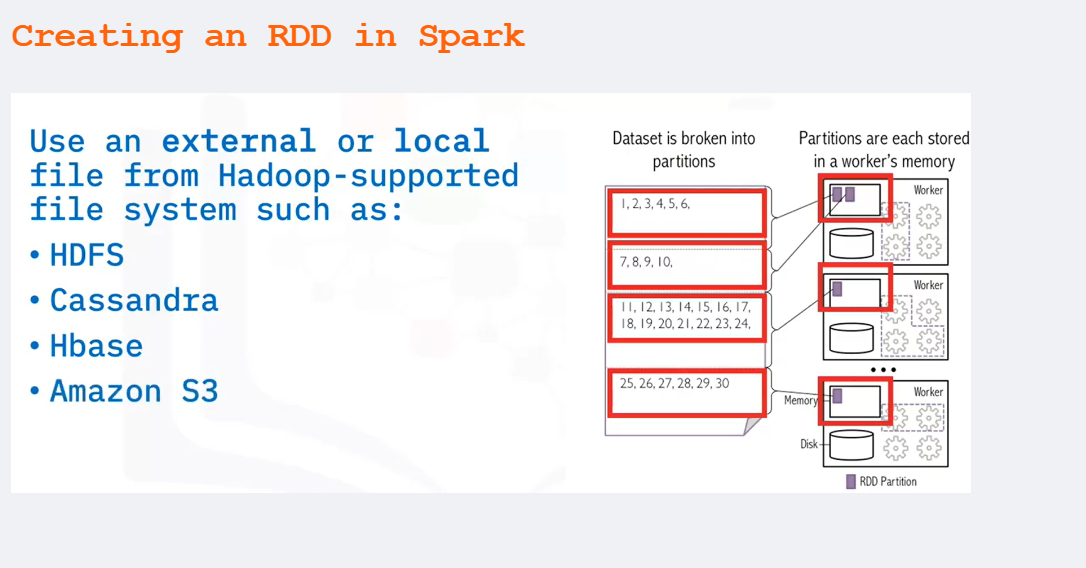

Resilient Distributed Datasets
Resilient Distributed Datasets (RDD) is a fundamental data structure of Spark. It is an immutable distributed collection of objects. Each dataset in RDD is divided into logical partitions, which may be computed on different nodes of the cluster. RDDs can contain any type of Python, Java, or Scala objects, including user-defined classes.

Formally, an RDD is a read-only, partitioned collection of records. RDDs can be created through deterministic operations on either data on stable storage or other RDDs. RDD is a fault-tolerant collection of elements that can be operated on in parallel.

There are two ways to create RDDs − parallelizing an existing collection in your driver program, or referencing a dataset in an external storage system, such as a shared file system, HDFS, HBase, or any data source offering a Hadoop Input Format.

Spark makes use of the concept of RDD to achieve faster and efficient MapReduce operations. Let us first discuss how MapReduce operations take place and why they are not so efficient.

Data Sharing is Slow in MapReduce
MapReduce is widely adopted for processing and generating large datasets with a parallel, distributed algorithm on a cluster. It allows users to write parallel computations, using a set of high-level operators, without having to worry about work distribution and fault tolerance.

Unfortunately, in most current frameworks, the only way to reuse data between computations (Ex − between two MapReduce jobs) is to write it to an external stable storage system (Ex − HDFS). Although this framework provides numerous abstractions for accessing a clusters computational resources, users still want more.

Both Iterative and Interactive applications require faster data sharing across parallel jobs. Data sharing is slow in MapReduce due to replication, serialization, and disk IO. Regarding storage system, most of the Hadoop applications, they spend more than 90% of the time doing HDFS read-write operations.

Iterative Operations on MapReduce
Reuse intermediate results across multiple computations in multi-stage applications. The following illustration explains how the current framework works, while doing the iterative operations on MapReduce. This incurs substantial overheads due to data replication, disk I/O, and serialization, which makes the system slow.

Iterative Operations on MapReduce
Interactive Operations on MapReduce
User runs ad-hoc queries on the same subset of data. Each query will do the disk I/O on the stable storage, which can dominate application execution time.

The following illustration explains how the current framework works while doing the interactive queries on MapReduce.

Interactive Operations on MapReduce
Data Sharing using Spark RDD
Data sharing is slow in MapReduce due to replication, serialization, and disk IO. Most of the Hadoop applications, they spend more than 90% of the time doing HDFS read-write operations.

Recognizing this problem, researchers developed a specialized framework called Apache Spark. The key idea of spark is Resilient Distributed Datasets (RDD); it supports in-memory processing computation. This means, it stores the state of memory as an object across the jobs and the object is sharable between those jobs. Data sharing in memory is 10 to 100 times faster than network and Disk.

Let us now try to find out how iterative and interactive operations take place in Spark RDD.

Iterative Operations on Spark RDD
The illustration given below shows the iterative operations on Spark RDD. It will store intermediate results in a distributed memory instead of Stable storage (Disk) and make the system faster.

Note − If the Distributed memory (RAM) is not sufficient to store intermediate results (State of the JOB), then it will store those results on the disk.

Iterative Operations on Spark RDD
Interactive Operations on Spark RDD
This illustration shows interactive operations on Spark RDD. If different queries are run on the same set of data repeatedly, this particular data can be kept in memory for better execution times.

Interactive Operations on Spark RDD
By default, each transformed RDD may be recomputed each time you run an action on it. However, you may also persist an RDD in memory, in which case Spark will keep the elements around on the cluster for much faster access, the next time you query it. There is also support for persisting RDDs on disk, or replicated across multiple nodes.

# RDD Operations in PySpark

## Introduction to RDDs

Resilient Distributed Datasets (RDDs) form the fundamental building blocks of Apache Spark. Think of an RDD as a distributed collection of data that can be processed in parallel across multiple machines. The "resilient" part means that if any part of your data is lost due to hardware failure, Spark can automatically recover it.

RDDs are immutable, which means once created, they cannot be changed. Instead, operations on RDDs create new RDDs. This immutability is crucial for fault tolerance and enables Spark to track the lineage of transformations, allowing it to rebuild lost partitions.

## Types of RDD Operations

RDD operations fall into two main categories, and understanding this distinction is fundamental to working effectively with Spark:

### 1. Transformations (Lazy Operations)

Transformations are operations that create a new RDD from an existing one. They are "lazy," meaning they don't execute immediately when called. Instead, Spark builds up a computation graph and only executes it when an action is triggered. This lazy evaluation allows Spark to optimize the entire computation pipeline.

### 2. Actions (Eager Operations)

Actions are operations that trigger the execution of transformations and return results to the driver program or write data to external storage. When you call an action, Spark executes all the transformations in the lineage to produce the final result.

In [1]:
from pyspark import SparkContext, SparkConf

# Initialize Spark context
conf = SparkConf().setAppName("RDD_Operations_Demo")
sc = SparkContext(conf=conf)

# Create an RDD from a list
numbers = sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
numbers2 = sc.parallelize(range(1,11))




---

## Side note n `map()`, `filter()`, and `reduce()` in Python


`filter(), map(), and reduce()`
The built-in filter(), map(), and reduce() functions are all common in functional programming.

It’s important to understand these functions in a core Python context. Then, you’ll be able to translate that knowledge into PySpark programs and the Spark API.

1. `filter()` filters items out of an iterable based on a condition, typically expressed as a lambda function:

In [6]:
x = ['Python', 'programming', 'is', 'awesome!']
print(list(filter(lambda arg: len(arg) <8, x)))



['Python', 'is']


Note: Calling list() is required because filter() is also an iterable. filter() only gives you the values as you loop over them. list() forces all the items into memory at once instead of having to use a loop.

In [7]:
def is_less_than_8_characters(item):
    return len(item) < 8

x = ['Python', 'programming', 'is', 'awesome!']
results = []

for item in x:
    if is_less_than_8_characters(item):
        results.append(item)

print(results)

['Python', 'is']


2.` map()` is similar to filter() in that it applies a function to each item in an iterable, but it always produces a 1-to-1 mapping of the original items. The new iterable that map() returns will always have the same number of elements as the original iterable, which was not the case with filter():

In [8]:
x = ['Python', 'programming', 'is', 'awesome!']
print(list(map(lambda arg: arg.upper(), x)))

['PYTHON', 'PROGRAMMING', 'IS', 'AWESOME!']


In [9]:
# map() automatically calls the lambda function on all the items, effectively replacing a for loop like the following:
results = []

x = ['Python', 'programming', 'is', 'awesome!']
for item in x:
    results.append(item.upper())

print(results)

['PYTHON', 'PROGRAMMING', 'IS', 'AWESOME!']


3. `reduce()`

Finally, the last of the functional trio in the Python standard library is reduce(). As with filter() and map(), reduce() applies a function to elements in an iterable.

Again, the function being applied can be a standard Python function created with the def keyword or a lambda function.

However, reduce() doesn’t return a new iterable. Instead, reduce() uses the function called to reduce the iterable to a single value:



In [10]:
from functools import reduce
x = ['Python', 'programming', 'is', 'awesome!']
print(reduce(lambda val1, val2: val1 + val2, x))


Pythonprogrammingisawesome!


---

#### 1. map() - One-to-One Transformation

The map transformation applies a function to each element in the RDD and returns a new RDD with the transformed elements.

In [13]:
from pyspark import SparkContext, SparkConf

# Initialize Spark context
conf = SparkConf().setAppName("RDD_Operations_Demo")
sc = SparkContext(conf=conf)

# Create an RDD from a list
numbers = sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [14]:
squared_numbers = numbers.map(lambda x: x ** 2)
print("Original:", numbers.collect())
print("Squared:", squared_numbers.collect())


Original: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Squared: [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [15]:
words = sc.parallelize(["hello", "world", "spark", "rdd"])
upper_words = words.map(lambda word: word.upper())
print("Uppercase:", upper_words.collect())

Uppercase: ['HELLO', 'WORLD', 'SPARK', 'RDD']


#### 2. filter() - Selective Transformation

The filter transformation returns a new RDD containing only elements that satisfy a given condition.

In [16]:
even_numbers = numbers.filter(lambda x: x % 2 == 0)
print("Even numbers:", even_numbers.collect())

Even numbers: [2, 4, 6, 8, 10]


In [17]:
long_words = words.filter(lambda word: len(word) > 4)
print("Long words:", long_words.collect())

Long words: ['hello', 'world', 'spark']


#### 3. flatMap() - One-to-Many Transformation

The flatMap transformation is similar to map, but each input element can be mapped to zero or more output elements. The results are flattened into a single RDD.

In [18]:
sentences = sc.parallelize(["Hello world", "Apache Spark", "RDD operations"])


words_flat = sentences.flatMap(lambda sentence: sentence.split(" "))
print("Flattened words:", words_flat.collect())

Flattened words: ['Hello', 'world', 'Apache', 'Spark', 'RDD', 'operations']


In [28]:
words_nested = sentences.map(lambda sentence: sentence.split(" "))
print("Nested structure:", words_nested.collect())


Nested structure: [['Hello', 'world'], ['Apache', 'Spark'], ['RDD', 'operations']]


In [27]:
x = ["Hello world", "Apache Spark", "RDD operations"]
reuslts2 = []
for i in x:
  reuslts2.append(i.split(" "))

print(reuslts2)


[['Hello', 'world'], ['Apache', 'Spark'], ['RDD', 'operations']]


### Set Operations

RDDs support mathematical set operations that are particularly useful for data analysis:

In [31]:
rdd1 = sc.parallelize([1, 2, 3, 4, 5])
rdd2 = sc.parallelize([4, 5, 6, 7, 8])

# 1. union()
union_result = rdd1.union(rdd2)
print("Union:", union_result.collect())



Union: [1, 2, 3, 4, 5, 4, 5, 6, 7, 8]


In [32]:
# 2. distinct_union()
distinct_union = rdd1.union(rdd2).distinct()
print("Distinct Union:", distinct_union.collect())

Distinct Union: [4, 8, 1, 5, 2, 6, 3, 7]


In [33]:
# 3. intersection()

intersection_result = rdd1.intersection(rdd2)
print("Intersection:", intersection_result.collect())

Intersection: [4, 5]


In [34]:
# 4. subtract()

subtract_result = rdd1.subtract(rdd2)
print("Subtract:", subtract_result.collect())

Subtract: [1, 2, 3]


---

**mapPartitions(func)**
   - **Description**: Applies a function to each partition of the RDD.
   - **Use Case**: To apply a transformation at the partition level.
   - **Example**:


---

In [44]:
rdd = sc.parallelize([1, 2, 3, 4, 5, 6], 2)


result = rdd.mapPartitions(lambda iter: [sum(iter)]).collect()
print(result)

[6, 15]


**distinct()**
   - **Description**: Returns a new RDD with distinct elements.
   - **Use Case**: To remove duplicate elements from a dataset.
   - **Example**:

   

In [45]:
rdd = sc.parallelize([1, 2, 2, 3, 4, 4, 5])
result = rdd.distinct().collect()
print(result)

[2, 4, 1, 3, 5]


### Advanced Transformations

#### `groupByKey()` and `reduceByKey()`

These operations work with key-value pair RDDs and are fundamental for aggregation operations:

In [35]:
sales_data = sc.parallelize([
    ("laptop", 1000), ("mouse", 25), ("laptop", 1200),
    ("keyboard", 75), ("mouse", 30), ("laptop", 800)
])



In [38]:
# groupByKey groups values by key
grouped_sales = sales_data.groupByKey()
grouped_sales.mapValues(list).collect()

[('laptop', [1000, 1200, 800]), ('mouse', [25, 30]), ('keyboard', [75])]

In [39]:
total_sales = sales_data.reduceByKey(lambda x, y: x + y)
print("Total sales by product:", total_sales.collect())


Total sales by product: [('laptop', 3000), ('mouse', 55), ('keyboard', 75)]


> The key difference between these operations is efficiency: reduceByKey performs local aggregation before shuffling data across the network, making it much faster for large datasets than groupByKey followed by a reduction.


#### join() Operations

Join operations combine two key-value RDDs based on their keys:

In [40]:
products = sc.parallelize([("laptop", "Electronics"), ("mouse", "Electronics"), ("book", "Media")])
prices = sc.parallelize([("laptop", 1000), ("mouse", 25), ("tablet", 300)])

In [ ]:
# Inner join - only keys present in both RDDs
inner_joined = products.join(prices)
print("Inner join:", inner_joined.collect())

Inner join: [('laptop', ('Electronics', 1000)), ('mouse', ('Electronics', 25))]


In [42]:
# Left outer join - all keys from left RDD
left_joined = products.leftOuterJoin(prices)
print("Left outer join:", left_joined.collect())

Left outer join: [('laptop', ('Electronics', 1000)), ('mouse', ('Electronics', 25)), ('book', ('Media', None))]


In [43]:
# Right outer join - all keys from right RDD
right_joined = products.rightOuterJoin(prices)
print("Right outer join:", right_joined.collect())

Right outer join: [('laptop', ('Electronics', 1000)), ('mouse', ('Electronics', 25)), ('tablet', (None, 300))]


# Actions


## Action Operations

Actions trigger the execution of transformations and return results. Here are the most commonly used actions:

In [46]:
sample_numbers = sc.parallelize([1, 2, 3, 4, 5, 4, 3, 2, 1])

# 1. collect() - returns all elements as a list (use carefully with large datasets)
all_elements = sample_numbers.collect()

print("All elements:", all_elements)


All elements: [1, 2, 3, 4, 5, 4, 3, 2, 1]


In [47]:
# 2. count() - returns the number of elements
element_count = sample_numbers.count()
print("Count:", element_count)

Count: 9


In [48]:
# 3. first() - returns the first element
first_element = sample_numbers.first()
print("First element:", first_element)

First element: 1


In [49]:
# 4. take(n) - returns first n elements
first_three = sample_numbers.take(3)
print("First three:", first_three)

First three: [1, 2, 3]


In [50]:
# 5. top(n) - returns top n elements in descending order
top_three = sample_numbers.top(3)
print("Top three:", top_three)

Top three: [5, 4, 4]


### Aggregation Actions

In [51]:

# Mathematical aggregations
sum_result = sample_numbers.sum()
print("Sum:", sum_result)

Sum: 25


In [52]:
# reduce() - applies a function to reduce all elements to a single value
max_value = sample_numbers.reduce(lambda x, y: x if x > y else y)
print("Maximum:", max_value)

Maximum: 5


In [96]:
nums2 = sc.parallelize(range(1,11))
total = nums2.reduce(lambda x, y: x + y)
print("Total:", total)

total: 55


In [106]:
# fold() - similar to reduce but with an initial value
sample_nums = sc.parallelize(range(1,11))
print(sample_nums.getNumPartitions())
sum_with_initial = sample_nums.fold(0, lambda x, y: x+y)
print("Sum with initial 10:", sum_with_initial)


2
Sum with initial 10: 55



> The actual calculation becomes: (sum of all elements) + (initial_value × number_of_partitions) + initial_value


**When fold() Becomes Necessary**

The key limitation of `reduce()` is that it requires your RDD to have at least one element. If you try to call `reduce()` on an empty RDD, Spark will throw an exception because there's nothing to reduce. This is where `fold()` becomes valuable, because it can handle empty RDDs gracefully by returning the initial value.

Consider this scenario: you're processing daily sales data, but some days might have no sales at all. With `reduce()`, your code would crash on those empty days. With `fold()` and a proper identity element, you'd get a sensible default result.

55

In [60]:
rdd = sc.parallelize([1, 2, 3, 4, 5])
result = rdd.fold(0, lambda x, y: x + y)
print(result)

15


**foreach(func)**
- **Description**: Applies a function to each element of the RDD or DataFrame.
- **Use Case**: For side effects, such as writing to a database or updating an accumulator.
- **Example**:

In [93]:
rdd = sc.parallelize(["py", "pi", "py", "sy", "sai", "sai", "sai"], 4)
rdd.getNumPartitions()

4

In [ ]:
rdd = sc.parallelize(["py", "pi", "py", "sy", "sai", "sai", "sai"])

def print_element(x):
  print(x)

rdd.foreach(print_element)


"""

When you run rdd.foreach(print_element) in Spark, the print statements execute
on the worker nodes (the machines that actually process your data), not on the
driver program where you're running your code. This means the output gets
printed to the worker node logs, not to your console or notebook output.

Why This Happens
Spark is designed for distributed computing. Your RDD is partitioned across
multiple worker nodes, and when you call foreach, each worker processes its
portion of the data independently. The print function executes locally on each
worker, so the output appears in the worker logs rather than being collected
back to your driver program.

"""

**The Primary Purpose of foreach()**

The `foreach()` action exists specifically for performing **side effects** on each element of your RDD without returning any data back to your driver program.
> Think of it as Spark's way of saying "go do something with each piece of data, but I don't need you to report back what you did."

This might seem strange at first, especially coming from regular Python programming where you expect functions to return results. But in distributed computing, there are many scenarios where you want to process data without collecting results back to a central location.


**Understanding Side Effects in Distributed Systems**
A side effect is any operation that changes something outside of the function itself, rather than just returning a value. In the context of distributed data processing, side effects typically involve interacting with external systems or resources.




**Practical Use Cases Where foreach() Shines**
1. **Writing Data to External Systems**: dbs

```python
# Example: Writing each record to a database
def save_to_database(record):
    # This function connects to a database and saves the record
    # We don't need to return anything - the "result" is the data being saved
    database_connection = get_db_connection()
    database_connection.insert(record)
    database_connection.close()

# Process millions of records, saving each one
large_rdd = sc.parallelize(get_large_dataset())
large_rdd.foreach(save_to_database)  # Each worker saves its portion directly
```


2. **Sending Notifications or Messages**


```python
def send_alert_if_needed(sensor_reading):
    # Check if this sensor reading indicates a problem
    if sensor_reading['temperature'] > 100:
        send_email_alert(f"High temperature detected: {sensor_reading['temperature']}")
        log_emergency(sensor_reading)
    # Again, no return value needed - the action is sending the alert

sensor_data_rdd = sc.parallelize(sensor_readings)
sensor_data_rdd.foreach(send_alert_if_needed)  # Each worker checks its data independently
```


**Understanding the Distributed Execution Model**

Here's where `foreach()` really demonstrates Spark's distributed nature. When you call `foreach()`, the function you provide gets serialized and sent to each worker node. Each worker then executes that function on its portion of the data, completely independently.

This means your function runs in parallel across multiple machines, each processing different chunks of your data simultaneously. The workers don't communicate with each other or send results back to the driver unless you explicitly program them to do so.

In [94]:
# This function runs on multiple worker nodes simultaneously
def process_on_worker(data_chunk):
    # This print statement appears in the worker node logs, not your console
    print(f"Worker processing: {data_chunk}")
    # This file gets written on whichever worker is processing this chunk
    with open(f"/tmp/worker_output_{data_chunk}.txt", "w") as f:
        f.write(f"Processed {data_chunk}")

rdd = sc.parallelize(["py", "pi", "py", "sy", "sai", "sai", "sai"])
rdd.foreach(process_on_worker)


In [87]:
rdd = sc.parallelize(["py", "pi", "py", "sy", "sai", "sai", "sai"])

def element_length(x):
  return len(x)

lens = rdd.map(element_length)
lens.collect()


[2, 2, 2, 2, 3, 3, 3]

**countByKey()**
- **Description**: For an RDD of (K, V) pairs, returns a dictionary of (K, Int) pairs with the count of each key.
- **Use Case**: To count occurrences of each key.
- **Example**:

In [74]:
rdd = sc.parallelize([('a', 1), ('b', 1), ('a', 1), ('a', 55)])
result = rdd.countByKey()

print(result)
for k, v in  result.items():
  print(k, v)

defaultdict(<class 'int'>, {'a': 3, 'b': 1})
a 3
b 1


**countByValue()**
- **Description**: Returns a dictionary of (value, count) pairs, similar to `countByKey` but for values.
- **Use Case**: To count occurrences of each value.
- **Example**:

In [77]:
rdd = sc.parallelize(["py", "pi", "py", "sy", "sai", "sai", "sai"])
result = rdd.countByValue()
print(result)

for k, v in  result.items():
  print(k, v)

defaultdict(<class 'int'>, {'py': 2, 'pi': 1, 'sy': 1, 'sai': 3})
py 2
pi 1
sy 1
sai 3


In [62]:
rdd = sc.parallelize([1, 2, 3, 4, 5])
rdd.saveAsTextFile("/contents/")

Special variables that can be used in parallel operations. PySpark provides two types of shared variables:


### 1. Broadcast Variables in PySpark

#### Key Points:

- **Definition**: Broadcast variables allow the programmer to keep a read-only variable cached on each machine rather than shipping a copy of it with tasks.
- **Purpose**: They are useful for sharing large datasets across all nodes to avoid the overhead of serializing and deserializing the dataset multiple times.
- **Read-Only**: Broadcast variables are read-only; they cannot be modified by the tasks once broadcasted.

In [108]:

#boardcating the variable
bc = sc.broadcast(["python", "databricks", "deltalake", "spark", "azure"])
#calling the boardcasted variable
var = bc.value # returns a list
print(var)
print(type(var))

['python', 'databricks', 'deltalake', 'spark', 'azure']
<class 'list'>


#### Practical Use Cases:

1. **Lookup Tables**:
    - **Scenario**: You have a large lookup table that needs to be used by each node to map some values in a large RDD.
    - **Example**:

In [109]:
# Large lookup table
lookup_table = {1: "one", 2: "two", 3: "three"}

# Broadcast the lookup table
broadcast_lookup = sc.broadcast(lookup_table)

# Data RDD
data = sc.parallelize([1, 2, 3, 4, 5])

# Use the broadcast variable in a transformation
result = data.map(lambda x: broadcast_lookup.value.get(x, "unknown")).collect()

print(result)

['one', 'two', 'three', 'unknown', 'unknown']


In [110]:
# YOUR TASK: Understand the applications of broadcast vars in case of joins!



### 2. Accumulators in PySpark

#### Key Points:

- **Definition**: Accumulators are variables that are only “added” to through an associative and commutative operation and can be used to implement counters or sums.
- **Purpose**: They are useful for aggregating information across the cluster, such as counting events or accumulating values.
- **Write-Only from Workers**: Accumulators can be updated from the workers, but the value is only reliably read by the driver program.


### Behavior and Characteristics:

- **Initialization**:    
    - An accumulator is created on the driver and initialized to a given value.
- **Update Mechanism**:    
    - Tasks running on workers add to the accumulator using operations like `+=`.
    - Each task has its own local copy of the accumulator to which it writes.
- **Aggregation**:    
    - The driver program periodically aggregates these updates.
    - The aggregated value can be accessed on the driver program using the `value` attribute.

In [115]:

# Create an accumulator
error_count = sc.accumulator(0) # error count is

# Data RDD
data = sc.parallelize(["good", "bad", "good", "bad", "good"])

# Function to identify and count errors
def process_record(record):
    global error_count
    if record == "bad":
        error_count += 1
        return record
    else:
      return "it's good"

# Process data
result = data.map(process_record).collect()
print("bad results: ", result)

# The value of the accumulator on the driver
print(f"Number of errors: {error_count.value}")

bad results:  ["it's good", 'bad', "it's good", 'bad', "it's good"]
Number of errors: 2


In [116]:


total_sales = sc.accumulator(0.0)

# Data RDD
data = sc.parallelize([100.0, 200.5, 300.0, 150.75, 250.25])

# Function to add sales amount to the accumulator
def add_sales(sale):
    global total_sales
    total_sales += sale

# Apply the function
data.foreach(add_sales)

# The value of the accumulator on the driver
print(f"Total sales: {total_sales.value}")

Total sales: 1001.5
